<a href="https://colab.research.google.com/github/shubham2721/US_ACCIDENTS_DASHBOARD/blob/main/Customer_Spending_Score(Classification_Problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Spending Score
Customer Spending score involves partitioning the customer base into groups that are similar in specific ways concerning marketing. The factors considered for such a division might include age, gender and interests. The goal of segmenting customers based on spending score is to maximize the value of each customer to the business by operating with the understanding that every customer is different and thereby allowing marketers to devise marketing strategies that would address each customer in a personalized and effective way. Further, companies can also better understand their customers' preferences and what each customer sub-group finds most valuable to tailor marketing materials more accurately.

<b> Let's Import All the libraries



In [ ]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import opendatasets as od

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

**Let's download the dataset**

In [ ]:
od.download('https://drive.google.com/file/d/1nnYdPaoi_fToIz3LHfB_BxKQQFntgNPV/view?usp=sharing')
od.download('https://drive.google.com/file/d/1FzlMuZZBMUhj1LN57VH9brl8iXHz1GqZ/view?usp=sharing')

112573it [00:00, 92818042.89it/s]


Downloaded to  ./Test.csv


387345it [00:00, 97593721.56it/s]

Downloaded to  ./Train.csv


In [ ]:
df_train = pd.read_csv('/content/Train.csv')

In [ ]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Spending_Score
0,462809,Male,No,22,No,Healthcare,1.0,4.0,Cat_4,Low
1,462643,Female,Yes,38,Yes,Engineer,NaN,3.0,Cat_4,Average
2,466315,Female,Yes,67,Yes,Engineer,1.0,1.0,Cat_6,Low
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2.0,Cat_6,High
4,462669,Female,Yes,40,Yes,Entertainment,NaN,6.0,Cat_6,High


In [ ]:
df_train = df_train.drop(columns = ['Var_1'])

In [ ]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size,Spending_Score
0,462809,Male,No,22,No,Healthcare,1.0,4.0,Low
1,462643,Female,Yes,38,Yes,Engineer,NaN,3.0,Average
2,466315,Female,Yes,67,Yes,Engineer,1.0,1.0,Low
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2.0,High
4,462669,Female,Yes,40,Yes,Entertainment,NaN,6.0,High


In [ ]:
df_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Spending_Score       0
dtype: int64

In [ ]:
# we will drop the columns having more number of null values
drop_max_null_columns = df_train.isnull().sum()[df_train.isnull().sum() > 1000].reset_index()['index'].to_list()
drop_max_null_columns

[]

In [ ]:
# converting all the null values to 
null_columns = df_train.isnull().sum()[df_train.isnull().sum() > 0].index.to_list()

In [ ]:
null_columns

['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size']

In [ ]:
# for object mode and for integer and float it will be mean
for i in null_columns:
  if df_train[i].dtypes == np.float64 or df_train[i].dtypes == np.int64:
    df_train[i].fillna(df_train[i].mean(), inplace = True)
  else:
     df_train[i].fillna(df_train[i].mode()[0], inplace = True)

In [ ]:
# checking if any null values
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

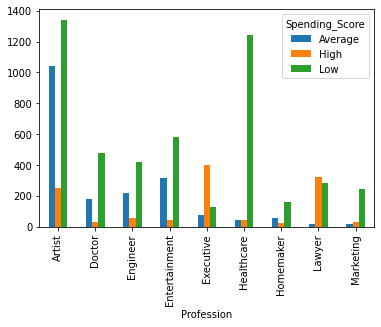

In [ ]:
# Now we will seperately see Profession impact over spending score
pd.crosstab(df_train['Profession'], df_train['Spending_Score']).plot(kind = "bar")

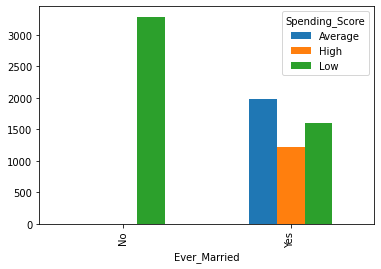

In [ ]:
# Now we will seperately see this Ever Married impact over spending score
pd.crosstab(df_train['Ever_Married'], df_train['Spending_Score']).plot(kind = "bar")

In [ ]:
# Converting the columns into numeric |

df_train['Gender'] = df_train['Gender'].replace({'Male' : 1 , 'Female' : 0})
df_train['Graduated'] = df_train['Graduated'].replace({'Yes': 1, 'No' : 0})
df_train['Ever_Married'] = df_train['Ever_Married'].replace({'Yes': 1, 'No' : 0})
df_train['Profession'] = df_train['Profession'].replace({'Healthcare': 1, 'Engineer' : 2,
                                          'Lawyer': 3, 'Artist': 4,
                                          'Doctor': 5 , 'Homemaker' : 6, 'Entertainment': 7,
                                          'Marketing' : 8 , 'Executive' : 9})
df_train['Spending_Score'] = df_train['Spending_Score'].replace({'Low': 0, 'High' : 2, 'Average' : 1})

In [ ]:
correlation = df_train.corr()
correlation

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size,Spending_Score
ID,1.000000,0.006155,0.022892,-0.005055,-0.009377,0.000543,-0.028876,0.011514,0.005773
Gender,0.006155,1.000000,0.111732,0.030216,-0.033206,0.189869,-0.056732,0.054702,0.061432
Ever_Married,0.022892,0.111732,1.000000,0.556892,0.188450,0.247932,-0.089964,-0.074340,0.610642
Age,-0.005055,0.030216,0.556892,1.000000,0.235752,0.176089,-0.179361,-0.273291,0.415485
Graduated,-0.009377,-0.033206,0.188450,0.235752,1.000000,0.070615,0.030660,-0.222938,0.102736
Profession,0.000543,0.189869,0.247932,0.176089,0.070615,1.000000,0.033247,-0.044918,0.245331
Work_Experience,-0.028876,-0.056732,-0.089964,-0.179361,0.030660,0.033247,1.000000,-0.058702,-0.070869
Family_Size,0.011514,0.054702,-0.074340,-0.273291,-0.222938,-0.044918,-0.058702,1.000000,0.092477
Spending_Score,0.005773,0.061432,0.610642,0.415485,0.102736,0.245331,-0.070869,0.092477,1.000000


As in the last column we can see the Ever_married, Age has very high impact over the spending score

In [ ]:
# we will see the correlation of features columns with the spending score 
px.imshow(correlation)

In [ ]:
df_train['Age'].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88])

<h3>Classification </h3>
We will use the following model to predict the best spending score <br>
1. K Nearest Neighbor(KNN)<br>
2. Decision Tree<br>
3. Support Vector Machine<br>
4. Logistic Regression<br>

In [ ]:
# Now Splitting the data in form of X = features and y = target

X = df_train.drop(columns = ['Spending_Score']) # Feature columns
y = df_train['Spending_Score'] # Target Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [ ]:
# Using models to get the best accuracy score
 
models = {"Decision Tree" : DecisionTreeClassifier(),
         "Logistic Regression" : LogisticRegression(),
         "Support Vector Machine" : svm.SVC(),
          "K Nearest Neighbor" :  KNeighborsClassifier(),
          "Randoim Forest Classifier" : RandomForestClassifier()}

Accuracy Score

In [ ]:
# Now we will create a function for finding the best model Accuracy Score
def fit_score(model, X_train, X_test, y_train, y_test):
    # set Random Seed
    np.random.seed(42)
    # this dicionary will add accuracy score to the models
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        model = model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        model_scores[name] = accuracy_score(y_preds, y_test)
    return model_scores

In [ ]:
accuracy_score = fit_score(model = models,
          X_train = X_train,
          X_test = X_test,
          y_train= y_train,
          y_test = y_test)

In [ ]:
model_compare = pd.DataFrame(score, index = ['accuracy'])

In [ ]:
model_compare = model_compare.T

In [ ]:
px.bar(x = model_compare.index, y = model_compare['accuracy'], color =  model_compare['accuracy'])

Now we got the highest score from Random Forest Classifier model we will tune its hyper parameter to get the best score

In [ ]:
np.arange(0,20,5)

array([ 0,  5, 10, 15])

In [ ]:
rs_params = {"n_estimators" : [100, 200, 300, 400],
           "max_depth" : [None, 3, 5, 10, 15],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}

In [ ]:
# Using Randomized Search CV for improving the accuracy score
np.random.seed(42)
rs_random_for = RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions = rs_params,
                                  cv = 5,
                                  verbose = True)
rs_new = rs_random_for.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
rs_random_for.best_params_

{'max_depth': 15,
 'min_samples_leaf': 15,
 'min_samples_split': 18,
 'n_estimators': 100}

In [ ]:
new_score = rs_new.score(X_test, y_test)

In [ ]:
print(f"The Default Score of Random Forest Classifier is {model_compare['accuracy'][2]}")
print(f"After tuning the Score of Random Forest Classifier is {new_score}")

The Default Score of Random Forest Classifier is 0.614002478314746
After tuning the Score of Random Forest Classifier is 0.8110285006195787
